In [7]:
'''
【项目14】  婚恋配对实验

婚恋配对模拟规则：
① 按照一定规则生成了1万男性+1万女性样本：
   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分
   ** 财富值符合指数分布，内涵和颜值符合正态分布
   ** 三项的平均值都为60分，标准差都为15分
② 模拟实验。基于现实世界的提炼及适度简化，我们概括了三个最主流的择偶策略：
   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
③ 每一轮实验中，我们将三种策略随机平分给所有样本（即采用每种策略的男性有3333个样本）
④ 我们为每位单身男女随机选择一个对象，若双方互相符合要求就算配对成功，配对失败的男女则进入下一轮配对。

1、样本数据处理
   ** 按照一定规则生成了1万男性+1万女性样本：
   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分
   ** 财富值符合指数分布，内涵和颜值符合正态分布
   ** 三项的平均值都为60分，标准差都为15分
要求：
① 构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性数据样本
   ** 包括三个指标：财富、内涵、外貌
② 绘制柱状图来查看每个人的属性分值情况

2、生成99个男性、99个女性样本数据，分别针对三种策略构建算法函数
   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；
   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；
   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内
   ** 每一轮实验中，我们将三种策略随机平分给所有样本，这里则是三种策略分别33人
   ** 这里不同策略匹配结果可能重合，所以为了简化模型 
   → 先进行策略1模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据，再进行策略2模拟，
   → 模拟完成后去掉该轮成功匹配的女性数据，再进行策略3模拟
要求：
① 生成样本数据
② 给男性样本数据，随机分配策略选择 → 这里以男性为出发作为策略选择方
③ 尝试做第一轮匹配，记录成功的匹配对象，并筛选出失败的男女性进入下一轮匹配
④ 构建模型，并模拟1万男性+1万女性的配对实验
⑤ 通过数据分析，回答几个问题：
   ** 百分之多少的样本数据成功匹配到了对象？
   ** 采取不同择偶策略的匹配成功率分别是多少？
   ** 采取不同择偶策略的男性各项平均分是多少？
   
3、以99男+99女的样本数据，绘制匹配折线图
要求：
① 生成样本数据，模拟匹配实验
② 生成绘制数据表格
③ bokhe制图
   ** 这里设置图例，并且可交互（消隐模式）
   
4、生成“不同类型男女配对成功率”矩阵图
要求：
① 以之前1万男+1万女实验的结果为数据
② 按照财富值、内涵值、外貌值分别给三个区间，以区间来评判“男女类型”
   ** 高分（70-100分），中分（50-70分），低分（0-50分）
   ** 按照此类分布，男性女性都可以分为27中类型：财高品高颜高、财高品中颜高、财高品低颜高、... （财→财富，品→内涵，颜→外貌）
③ bokhe制图
   ** 散点图
   ** 27行*27列，散点的颜色深浅代表匹配成功率
'''

'\n【项目14】  婚恋配对实验\n\n婚恋配对模拟规则：\n① 按照一定规则生成了1万男性+1万女性样本：\n   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分\n   ** 财富值符合指数分布，内涵和颜值符合正态分布\n   ** 三项的平均值都为60分，标准差都为15分\n② 模拟实验。基于现实世界的提炼及适度简化，我们概括了三个最主流的择偶策略：\n   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；\n   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；\n   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内\n③ 每一轮实验中，我们将三种策略随机平分给所有样本（即采用每种策略的男性有3333个样本）\n④ 我们为每位单身男女随机选择一个对象，若双方互相符合要求就算配对成功，配对失败的男女则进入下一轮配对。\n\n1、样本数据处理\n   ** 按照一定规则生成了1万男性+1万女性样本：\n   ** 在配对实验中，这2万个样本具有各自不同的个人属性（财富、内涵、外貌），每项属性都有一个得分\n   ** 财富值符合指数分布，内涵和颜值符合正态分布\n   ** 三项的平均值都为60分，标准差都为15分\n要求：\n① 构建函数实现样本数据生成模型，函数参数之一为“样本数量”，并用该模型生成1万男性+1万女性数据样本\n   ** 包括三个指标：财富、内涵、外貌\n② 绘制柱状图来查看每个人的属性分值情况\n\n2、生成99个男性、99个女性样本数据，分别针对三种策略构建算法函数\n   ** 择偶策略1：门当户对，要求双方三项指标加和的总分接近，差值不超过20分；\n   ** 择偶策略2：男才女貌，男性要求女性的外貌分比自己高出至少10分，女性要求男性的财富分比自己高出至少10分；\n   ** 择偶策略3：志趣相投、适度引领，要求对方的内涵得分在比自己低10分~高10分的区间内，且外貌和财富两项与自己的得分差值都在5分以内\n   ** 每一轮实验中，我们将三种策略随机平分给所有样本，这里则是三种策略分别33人\

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib.font_manager import FontProperties
font = FontProperties(family='san serif', fname='/System/Library/Fonts/Hiragino Sans GB.ttc', style='italic', weight='bold', size='large')

In [9]:
# 1、样本数据处理
# ① 构建函数实现样本数据生成模型

def samplesConstruction(n_samples, gender):
    samples = pd.DataFrame({'Gender': [''] * n_samples,
                      'Fortune': [0] * n_samples,
                      'Character': [0] * n_samples,
                      'Appearance': [0] * n_samples},
                      columns=['Gender', 'Fortune', 'Character', 'Appearance'],
                      index=range(1, n_samples + 1))
    samples['Gender'] = gender
    samples['Fortune'] = np.random.exponential(15, (n_samples,)) + 45
    samples['Character'] = np.random.normal(60, 15, (n_samples,))
    samples['Appearance'] = np.random.normal(60, 15, (n_samples,))
    samples['MeanScore'] = (samples['Fortune'] + samples['Character'] + samples['Appearance']) / 3
    samples['TotalScore'] = samples['Fortune'] + samples['Character'] + samples['Appearance']
    return samples

In [10]:
samplesMale = samplesConstruction(10000, 'male')
samplesFemale = samplesConstruction(10000, 'female')

In [11]:
samplesMale.describe()

,Fortune,Character,Appearance,MeanScore,TotalScore
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,60.107341,60.006215,59.792356,59.968637,179.905912
std,15.358946,14.994503,15.159238,8.673074,26.019222
min,45.000225,0.222552,-1.075567,30.593343,91.780028
25%,49.263905,50.062779,49.505077,54.109854,162.329563
50%,55.312686,59.947714,59.710442,59.598501,178.795503
75%,65.750736,70.019415,69.968827,65.348644,196.045932
max,173.155199,115.366121,123.168930,101.123142,303.369425


In [12]:
samplesFemale.describe()

,Fortune,Character,Appearance,MeanScore,TotalScore
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,59.881297,60.089721,60.042286,60.004435,180.013304
std,14.819452,14.954189,15.149008,8.651504,25.954513
min,45.000056,1.880611,3.665613,32.143532,96.430595
25%,49.375747,50.182704,49.727693,54.152631,162.457894
50%,55.432221,60.058476,60.094902,59.638344,178.915033
75%,65.639847,70.169783,70.566054,65.308039,195.924116
max,247.565312,121.767719,115.445971,119.404394,358.213181


In [13]:
samplesMale.columns

Index(['Gender', 'Fortune', 'Character', 'Appearance', 'MeanScore',
       'TotalScore'],
      dtype='object')

In [14]:
samplesMale.head()

,Gender,Fortune,Character,Appearance,MeanScore,TotalScore
1,male,77.405025,56.738503,75.872556,70.005361,210.016084
2,male,46.976869,58.249334,80.503740,61.909981,185.729943
3,male,89.063839,47.536893,77.660522,71.420418,214.261254
4,male,53.232837,61.728698,60.855854,58.605796,175.817389
5,male,74.872873,50.303523,43.783881,56.320092,168.960277


In [15]:
samplesFemale.head()

,Gender,Fortune,Character,Appearance,MeanScore,TotalScore
1,female,45.069140,55.855463,98.167936,66.364180,199.092539
2,female,46.570343,63.444011,50.434404,53.482920,160.448759
3,female,69.614669,65.311812,43.980522,59.635668,178.907003
4,female,55.530120,34.117985,100.031710,63.226605,189.679814
5,female,47.202001,63.098985,71.606530,60.635839,181.907516


Text(0.5,1,'前50名男性的属性分值情况')

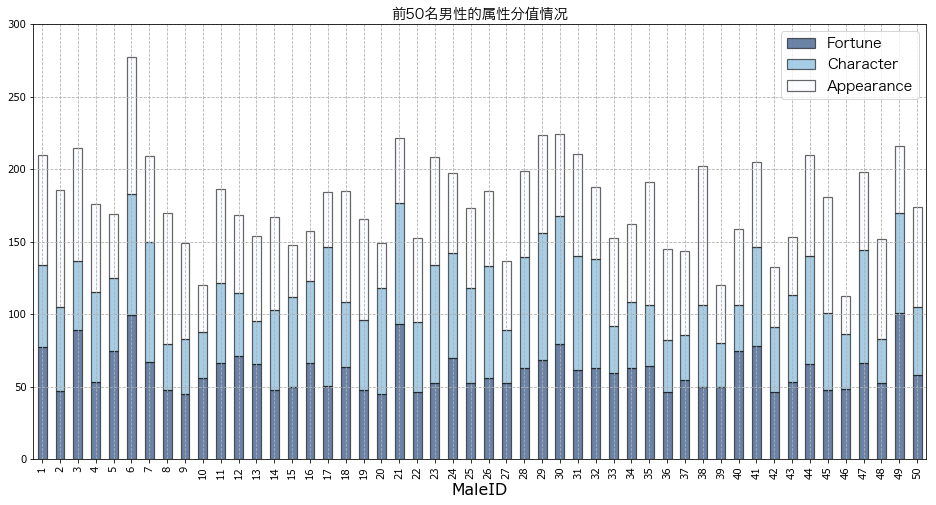

In [16]:
# ② 绘制柱状图来查看每个人的属性分值情况
# 男性样本前50名属性分值情况

samplesMale.loc[:50, samplesMale.columns[1:4]].plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Blues_r', alpha=0.6, edgecolor='black', linewidth=1.2)
plt.grid(linestyle='dashed', linewidth=0.8)
plt.legend(prop=font, loc='best')
plt.xlabel('MaleID', fontsize=16)
plt.ylim([0, 300])
plt.title('前50名男性的属性分值情况', fontproperties=font)

Text(0.5,1,'前50名女性的属性分值情况')

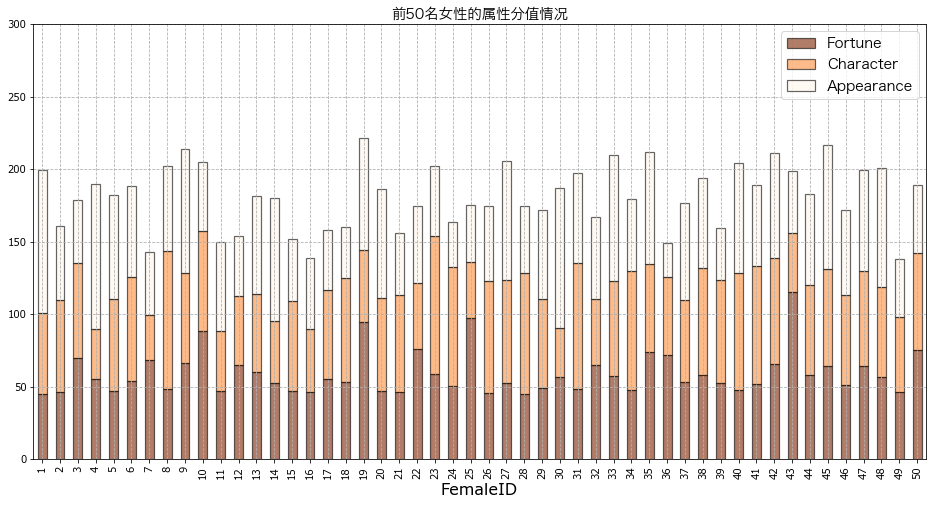

In [17]:
# 女性样本前50名属性分值情况

samplesFemale.loc[:50, samplesMale.columns[1:4]].plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Oranges_r', alpha=0.6, edgecolor='black', linewidth=1.2)
plt.grid(linestyle='dashed', linewidth=0.8)
plt.legend(prop=font, loc='best')
plt.xlabel('FemaleID', fontsize=16)
plt.ylim([0, 300])
plt.title('前50名女性的属性分值情况', fontproperties=font)

In [18]:
# 2、生成99个男性、99个女性样本数据，分别针对三种策略构建算法函数
# ① 生成样本数据

ninetynineMaleSamples = samplesConstruction(99, 'male')
ninetynineFemaleSamples = samplesConstruction(99, 'female')

In [19]:
# 无重复随机数列表生成器

def randomNumberGenerator(n_samples_strategy, samplesMale, firsttime=True, randomSelect1=None):
    randomSelect = []
    indexList = []
    while len(randomSelect) != n_samples_strategy:
        if firsttime:
            if n_samples_strategy == 33:
                r = np.random.randint(1, n_samples_strategy * 3 + 1)
                if r not in randomSelect: randomSelect.append(r)
            if n_samples_strategy == 3333 or n_samples_strategy == 333:
                r = np.random.randint(1, n_samples_strategy * 3 + 2)
                if r not in randomSelect: randomSelect.append(r)
        else:
            for index in samplesMale.index:
                if index not in randomSelect1:
                    indexList.append(index)
            r  = np.random.choice(indexList, 1)[0]
            if r not in randomSelect: randomSelect.append(r)      
    return randomSelect

In [20]:
# ② 给男性样本数据，随机分配策略选择
# 策略均分随机选择

def strategiesAllocation(n_samples_strategy, strategyList, samplesMale): 
    # 随机选择一个策略
    # samplesMale.loc[male, 'strategy'] = np.random.choice([1, 2, 3], 1)
    
    # 均匀分配策略
    randomDict = {}
    randomSelect1 = randomNumberGenerator(n_samples_strategy, samplesMale)
    samplesMale.loc[randomSelect1, 'Strategy'] = random1 = np.random.choice(strategyList, 1)[0]
    randomDict.update({random1: randomSelect1})
    strategyList.remove(random1)
    randomSelect2 = randomNumberGenerator(n_samples_strategy, samplesMale, False, randomSelect1)
    samplesMale.loc[randomSelect2, 'Strategy'] = random2 = np.random.choice(strategyList, 1)[0]
    randomDict.update({random2: randomSelect2})
    strategyList.remove(random2)
    randomSelect3 = samplesMale[samplesMale['Strategy'].isnull()].index.tolist()
    samplesMale['Strategy'].fillna(strategyList[0], inplace=True)
    randomDict.update({strategyList[0]: randomSelect3})
    
    return samplesMale, randomDict

In [21]:
# ③ 尝试做第一轮匹配，记录成功的匹配对象，并筛选出失败的男女性进入下一轮匹配
# 策略算法
# 方案一：策略1先行，再策略2，最后策略3

def matingStrategies1(samplesMale, samplesFemale, randomDict):
    matchedDict = {}
    maleMatchList = [1]
    
    rounds = 1
    while maleMatchList:
        maleMatchList = []
        # 策略1
        matchList1 = []
        selectedList1 = []
        if randomDict[1]:
            while len(selectedList1) != len(randomDict[1]):
                male = np.random.choice(randomDict[1], 1)[0]
                if male not in selectedList1:
                    selectedList1.append(male)
                    successList1 = []
                    for female in samplesFemale.index:
                        if np.abs(samplesMale.loc[male, 'TotalScore'] - samplesFemale.loc[female, 'TotalScore']) <= 20:
                            successList1.append(female)
                    if successList1:
                        index1 = samplesFemale.loc[successList1, 'TotalScore'].argmax()
                        matchedDict.update({male: [index1, rounds + 0, 1]})
                        matchList1.append(male)
                        samplesMale.drop(male, inplace=True)
                        samplesFemale.drop(index1, inplace=True)
            randomDict[1] = [e for e in randomDict[1] if e not in matchList1]
            
        # 策略2
        matchList2 = []
        selectedList2 = []
        if randomDict[2]:
            while len(selectedList2) != len(randomDict[2]):
                male = np.random.choice(randomDict[2], 1)[0]
                if male not in selectedList2:
                    selectedList2.append(male)
                    successList2 = []
                    for female in samplesFemale.index:
                        if (samplesFemale.loc[female, 'Appearance'] - samplesMale.loc[male, 'Appearance'] >= 10) & \
                        (samplesMale.loc[male, 'Fortune'] - samplesFemale.loc[female, 'Fortune'] >= 10):
                            successList2.append(female)
                    if successList2:
                        index2 = samplesFemale.loc[successList2, 'TotalScore'].argmax()
                        matchedDict.update({male: [index2, rounds + 1, 2]})
                        matchList2.append(male)
                        samplesMale.drop(male, inplace=True)
                        samplesFemale.drop(index2, inplace=True)
            randomDict[2] = [e for e in randomDict[2] if e not in matchList2]

        # 策略3
        matchList3 = []
        selectedList3 = []
        if randomDict[3]:
            while len(selectedList3) != len(randomDict[3]):
                male = np.random.choice(randomDict[3], 1)[0]
                if male not in selectedList3:
                    selectedList3.append(male)
                    successList3 = []
                    for female in samplesFemale.index:
                        if ((np.abs(samplesMale.loc[male, 'Character'] - samplesFemale.loc[female, 'Character']) <= 10) & \
                        (np.abs(samplesMale.loc[male, 'Fortune'] - samplesFemale.loc[female, 'Fortune']) <= 5) & \
                        (np.abs(samplesMale.loc[male, 'Appearance'] - samplesFemale.loc[female, 'Appearance']) <= 5)):
                            successList3.append(female)
                    if successList3:
                            index3 = samplesFemale.loc[successList3, 'TotalScore'].argmax()
                            matchedDict.update({male: [index3, rounds + 2, 3]})
                            matchList3.append(male)
                            samplesMale.drop(male, inplace=True)
                            samplesFemale.drop(index3, inplace=True)
            randomDict[3] = [e for e in randomDict[3] if e not in matchList3]

        maleMatchList = matchList1 + matchList2 + matchList3

        if maleMatchList:
            rounds += 3

    return matchedDict, samplesMale, samplesFemale

> 说明：模型存在的一些问题，先选的有优势，也就是策略1先行，选到满足条件的比较多，接着策略2和策略3固然是配对成功的可能会小于策略1，因策略2和策略3用的数据都是策略1配对成功后剔除掉的数据，且策略2和策略3的条件相对更严格，更加减低了匹配成功的概率... 我们可以试下策略2先行，然后再3，最后1...

In [22]:
# 方案二：策略2先行，再策略3，最后策略1

def matingStrategies2(samplesMale, samplesFemale, randomDict):
    matchedDict = {}
    maleMatchList = [1]
    
    rounds = 1
    while maleMatchList:
        maleMatchList = []
        # 策略2
        matchList2 = []
        selectedList2 = []
        if randomDict[2]:
            while len(selectedList2) != len(randomDict[2]):
                male = np.random.choice(randomDict[2], 1)[0]
                if male not in selectedList2:
                    selectedList2.append(male)
                    successList2 = []
                    for female in samplesFemale.index:
                        if (samplesFemale.loc[female, 'Appearance'] - samplesMale.loc[male, 'Appearance'] >= 10) & \
                        (samplesMale.loc[male, 'Fortune'] - samplesFemale.loc[female, 'Fortune'] >= 10):
                            successList2.append(female)
                    if successList2:
                        index2 = samplesFemale.loc[successList2, 'TotalScore'].argmax()
                        matchedDict.update({male: [index2, rounds + 0, 2]})
                        matchList2.append(male)
                        samplesMale.drop(male, inplace=True)
                        samplesFemale.drop(index2, inplace=True)
            randomDict[2] = [e for e in randomDict[2] if e not in matchList2]

        # 策略3
        matchList3 = []
        selectedList3 = []
        if randomDict[3]:
            while len(selectedList3) != len(randomDict[3]):
                male = np.random.choice(randomDict[3], 1)[0]
                if male not in selectedList3:
                    selectedList3.append(male)
                    successList3 = []
                    for female in samplesFemale.index:
                        if ((np.abs(samplesMale.loc[male, 'Character'] - samplesFemale.loc[female, 'Character']) <= 10) & \
                        (np.abs(samplesMale.loc[male, 'Fortune'] - samplesFemale.loc[female, 'Fortune']) <= 5) & \
                        (np.abs(samplesMale.loc[male, 'Appearance'] - samplesFemale.loc[female, 'Appearance']) <= 5)):
                            successList3.append(female)
                    if successList3:
                            index3 = samplesFemale.loc[successList3, 'TotalScore'].argmax()
                            matchedDict.update({male: [index3, rounds + 1, 3]})
                            matchList3.append(male)
                            samplesMale.drop(male, inplace=True)
                            samplesFemale.drop(index3, inplace=True)
            randomDict[3] = [e for e in randomDict[3] if e not in matchList3]
            
        # 策略1
        matchList1 = []
        selectedList1 = []
        if randomDict[1]:
            while len(selectedList1) != len(randomDict[1]):
                male = np.random.choice(randomDict[1], 1)[0]
                if male not in selectedList1:
                    selectedList1.append(male)
                    successList1 = []
                    for female in samplesFemale.index:
                        if np.abs(samplesMale.loc[male, 'TotalScore'] - samplesFemale.loc[female, 'TotalScore']) <= 20:
                            successList1.append(female)
                    if successList1:
                        index1 = samplesFemale.loc[successList1, 'TotalScore'].argmax()
                        matchedDict.update({male: [index1, rounds + 2, 1]})
                        matchList1.append(male)
                        samplesMale.drop(male, inplace=True)
                        samplesFemale.drop(index1, inplace=True)
            randomDict[1] = [e for e in randomDict[1] if e not in matchList1]

        maleMatchList = matchList1 + matchList2 + matchList3

        if maleMatchList:
            rounds += 3

    return matchedDict, samplesMale, samplesFemale

In [23]:
ninetynineMaleSamples, randomDict1 = strategiesAllocation(33, [1, 2, 3], ninetynineMaleSamples)

In [24]:
ninetynineorignalMaleSamples = ninetynineMaleSamples.copy()
ninetynineMale = ninetynineMaleSamples.copy()
ninetynineorignalFemaleSamples = ninetynineFemaleSamples.copy()
ninetynineFemale = ninetynineFemaleSamples.copy()

In [25]:
matchedDict1, ninetyninesamplesMale1, ninetyninesamplesFemale1 = matingStrategies1(ninetynineMaleSamples, ninetynineFemaleSamples, randomDict1)

In [26]:
ninetyninesamplesMale1.Strategy.value_counts()

2.0    26
3.0    18
1.0     1
Name: Strategy, dtype: int64

In [27]:
ninetynineMale, randomDict2 = strategiesAllocation(33, [1, 2, 3], ninetynineMale)

In [28]:
matchedDict2, ninetyninesamplesMale2, ninetyninesamplesFemale2 = matingStrategies2(ninetynineMale, ninetynineFemale, randomDict2)

In [29]:
ninetyninesamplesMale2.Strategy.value_counts()

2.0    34
3.0    26
1.0     7
Name: Strategy, dtype: int64

In [30]:
MaleSamples1000 = samplesConstruction(1000, 'male')
FemaleSamples1000 = samplesConstruction(1000, 'female')

In [31]:
MaleSamples1000, randomDict1000 = strategiesAllocation(333, [1, 2, 3], MaleSamples1000)

In [32]:
matchedDict1000, ThousandOfMaleSamples, ThousandOfFemaleSamples = matingStrategies2(MaleSamples1000, FemaleSamples1000, randomDict1000)

In [33]:
ThousandOfMaleSamples.Strategy.value_counts()

2.0    161
3.0     55
1.0     48
Name: Strategy, dtype: int64

> 分析：从这里可以看出，先被随机选到进行匹配的人成功率更高，且匹配到的“质量”也会高很多（因为算法中既定了择优选择），且策略的优先顺序也会影响匹配结果，先进行的策略，匹配到的数量要多于后进行的策略（即使策略条件相对严格）... 从这来看，其实也符合现实生活中的情况，先选择的，量多，质好... 相对后选的，就差点，因为优质资源已经被选择掉... 不过，话说回来，这只是游戏，符合大众一般认知，现实生活毕竟是现实生活，人是主观性动物，很多会凭自己的主观认知来择偶，而不仅仅看“分数”...

In [34]:
# ④ 构建模型，并模拟1万男性+1万女性的配对实验
# 这里对于2万模型的模拟还是选择方案一，即先1，再2，最后3

# samplesMale, randomDict = strategiesAllocation(3333, [1, 2, 3], samplesMale)

In [35]:
from multiprocessing import Process, Pool
import os, time
# 若想运行查看效果，请取消这边的注释
# if __name__ =='__main__':
#    print ('Run the main process (%s).' % (os.getpid()))
#    mainStart = time.time()
#    p = Pool(8)
#    result1 = p.apply_async(strategiesAllocation, args=(3333, [1, 2, 3], samplesMale))
#    print ('Waiting for all subprocesses done ...')
#    p.close()
#    p.join()
#    print ('All subprocesses done.')
#    mainEnd = time.time()
#    print ('All process ran %0.2f mins.' % ((mainEnd-mainStart) / 60))

In [36]:
# 若想运行查看效果，请取消这边的注释
# samplesMale, randomDict = result1.get()[0], result1.get()[1]

In [37]:
import pickle
# # 若想运行查看效果，请取消这边的注释
# f = open('strategiesAllocation.txt', 'wb')
# pickle.dump([samplesMale, randomDict], f)
# f.close()

In [38]:
# 直接导入算法分配结果（因算法运行时间太长）
f = open('strategiesAllocation.txt', 'rb')
obj = pickle.load(f)
f.close()

In [39]:
samplesMale, randomDict = obj[0], obj[1]

In [40]:
orignalMaleSamples = samplesMale.copy()
orignalFemaleSamples = samplesFemale.copy()

In [41]:
# matchedDict, MaleSamples, FemaleSamples = matingStrategies1(samplesMale, samplesFemale, randomDict)

In [42]:
# 若想运行查看效果，请取消这边的注释
# if __name__ =='__main__':
#    print ('Run the main process (%s).' % (os.getpid()))
#    mainStart = time.time()
#    p = Pool(8)
#    result2 = p.apply_async(matingStrategies1, args=(samplesMale, samplesFemale, randomDict))
#    print ('Waiting for all subprocesses done ...')
#    p.close()
#    p.join()
#    print ('All subprocesses done.')
#    mainEnd = time.time()
#    print ('All process ran %0.2f mins.' % ((mainEnd-mainStart) / 60))

In [43]:
# 若想运行查看效果，请取消这边的注释
# matchedDict, MaleSamples, FemaleSamples = result2.get()[0], result2.get()[1], result2.get()[2]

In [44]:
# 若想运行查看效果，请取消这边的注释
# f = open('matingStrategies1.txt', 'wb')
# pickle.dump([matchedDict, MaleSamples, FemaleSamples], f)
# f.close()

In [45]:
# 直接导入算法分配结果
f = open('matingStrategies1.txt', 'rb')
obj = pickle.load(f)
f.close()

In [46]:
matchedDict, MaleSamples, FemaleSamples = obj[0], obj[1], obj[2]

In [47]:
def match(matchedDict):
    MaleIDList = []
    FemaleIDList = []
    RoundsList = []
    StrategyList = []
    for keys, values in matchedDict.items():
        MaleIDList.append(keys)
        FemaleIDList.append(values[0])
        RoundsList.append(values[1])
        StrategyList.append(values[2])
    matched = pd.DataFrame({'MaleID': MaleIDList, 'FemaleID': FemaleIDList, 'Round': RoundsList, 'Strategy': StrategyList}, columns=['MaleID', 'FemaleID', 'Round', 'Strategy'])
    return matched

In [48]:
matched = match(matchedDict)

In [49]:
matched.head()

,MaleID,FemaleID,Round,Strategy
0,1598,522,1,1
1,4046,8120,1,1
2,2022,5755,1,1
3,8396,215,1,1
4,2978,85,1,1


In [50]:
print('共有{:.2%}的样本数据成功匹配到对象'.format(len(matched) / 10000))

共有71.92%的样本数据成功匹配到对象


In [51]:
valueCounts1 = pd.DataFrame({'Counts1': orignalMaleSamples.Strategy.value_counts()})
valueCounts2 = pd.DataFrame({'Counts2': matched.Strategy.value_counts()})
valueCounts = pd.merge(valueCounts2, valueCounts1, left_index=True, right_index=True)
valueCounts['Rate'] = valueCounts.Counts2 / valueCounts.Counts1

In [52]:
valueCounts

,Counts2,Counts1,Rate
1,3324,3334,0.997001
3,2362,3333,0.708671
2,1506,3333,0.451845


In [53]:
print('择偶策略1的成功匹配率为{:.2%}'.format(valueCounts.loc[1.0, 'Rate']))
print('择偶策略2的成功匹配率为{:.2%}'.format(valueCounts.loc[2.0, 'Rate']))
print('择偶策略3的成功匹配率为{:.2%}'.format(valueCounts.loc[3.0, 'Rate']))

择偶策略1的成功匹配率为99.70%
择偶策略2的成功匹配率为45.18%
择偶策略3的成功匹配率为70.87%


In [54]:
SuccessMatched = pd.merge(matched, orignalMaleSamples[['Fortune', 'Character', 'Appearance']], left_on='MaleID', right_index=True, how='left')
IndicesMean = SuccessMatched.groupby('Strategy')[['Fortune', 'Character', 'Appearance']].mean()
IndicesMean.index = ['Strategy1', 'Strategy2', 'Strategy3']
IndicesMean.columns = ['MeanOfFortune', 'MeanOfCharacter', 'MeanOfAppearance']

In [55]:
IndicesMean

,MeanOfFortune,MeanOfCharacter,MeanOfAppearance
Strategy1,60.105375,60.372828,60.355195
Strategy2,70.921471,60.316290,57.077552
Strategy3,56.581333,56.138727,54.682300


In [56]:
print('择偶策略1的男性：')
print('财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % (IndicesMean.loc['Strategy1', 'MeanOfFortune'], IndicesMean.loc['Strategy1', 'MeanOfCharacter'], IndicesMean.loc['Strategy1', 'MeanOfAppearance']))
print('择偶策略2的男性：')
print('财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % (IndicesMean.loc['Strategy2', 'MeanOfFortune'], IndicesMean.loc['Strategy2', 'MeanOfCharacter'], IndicesMean.loc['Strategy2', 'MeanOfAppearance']))
print('择偶策略3的男性：')
print('财富均值为%.2f，内涵均值为%.2f，外貌均值为%.2f' % (IndicesMean.loc['Strategy3', 'MeanOfFortune'], IndicesMean.loc['Strategy3', 'MeanOfCharacter'], IndicesMean.loc['Strategy3', 'MeanOfAppearance']))

择偶策略1的男性：
财富均值为60.11，内涵均值为60.37，外貌均值为60.36
择偶策略2的男性：
财富均值为70.92，内涵均值为60.32，外貌均值为57.08
择偶策略3的男性：
财富均值为56.58，内涵均值为56.14，外貌均值为54.68


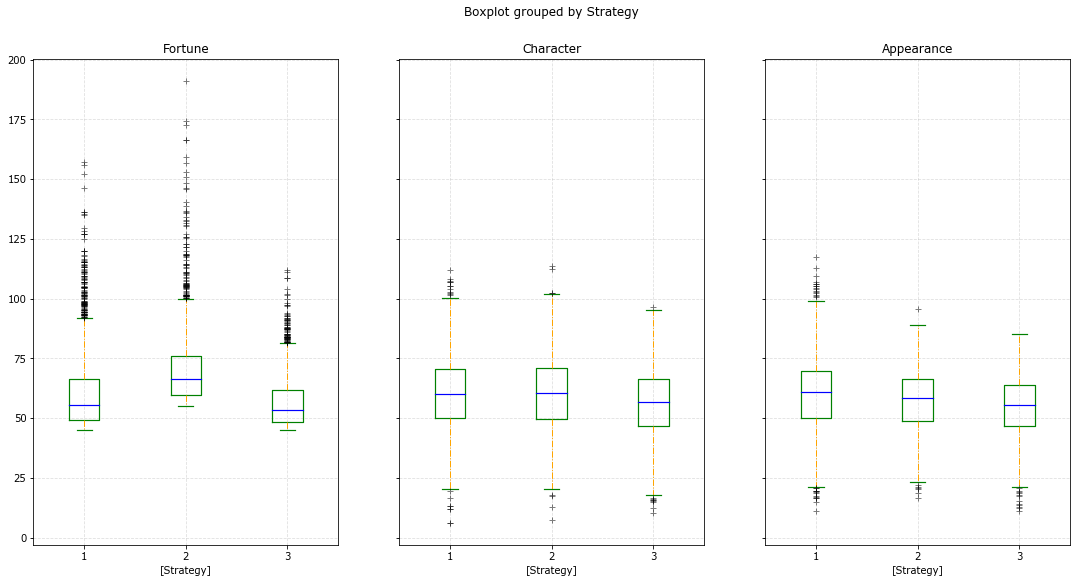

In [57]:
# 绘制箱型图（成功匹配）

plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.4

f = SuccessMatched.boxplot(column=['Fortune', 'Character', 'Appearance'], by=['Strategy'], layout=(1, 3),
            meanline=False,
            whis=1.5,
            showmeans=False,             
            showbox=True,
            figsize=[18, 9],
            return_type='dict')

for i in range(3):
    for box in f[i]['boxes']:
        box.set(color='green', linewidth=1.2)
    for whisker in f[i]['whiskers']:
        whisker.set(color='orange', linewidth=1, linestyle='-.')
    for cap in f[i]['caps']:
        cap.set(color='green', linewidth=1.2)
    for median in f[i]['medians']:
        median.set(color='blue', linewidth=1.2)
    for flier in f[i]['fliers']:
        flier.set(marker='+', color='black', alpha=0.5)

In [58]:
# 3、以99男+99女的样本数据，绘制匹配折线图
# ① 生成样本数据，模拟匹配实验 （使用之前的数据）
# ② 生成绘制数据表格

from bokeh.palettes import brewer

matched1 = match(matchedDict1)
SuccessMatched1 = pd.merge(matched1, ninetynineorignalMaleSamples[['Fortune', 'Character', 'Appearance', 'MeanScore']], left_on='MaleID', right_index=True, how='left')
SuccessMatched1.columns = ['MaleID', 'FemaleID', 'Round', 'Strategy', 'MaleFortune', 'MaleCharacter', 'MaleAppearance', 'MaleMeanScore']
SuccessMatched1 = pd.merge(SuccessMatched1, ninetynineorignalFemaleSamples[['Fortune', 'Character', 'Appearance', 'MeanScore']], left_on='FemaleID', right_index=True, how='left')
SuccessMatched1.columns = ['MaleID', 'FemaleID', 'Round', 'Strategy', 'MaleFortune', 'MaleCharacter', 'MaleAppearance', 'MaleMeanScore', 'FemaleFortune', 'FemaleCharacter', 'FemaleAppearance', 'FemaleMeanScore']

XList = []
YList = []
for i in SuccessMatched1.index:
    XList.append([0, SuccessMatched1.loc[i, 'FemaleID'], SuccessMatched1.loc[i, 'FemaleID']])
    YList.append([SuccessMatched1.loc[i, 'MaleID'], SuccessMatched1.loc[i, 'MaleID'], 0])
SuccessMatched1['X'] = XList
SuccessMatched1['Y'] = YList

n = len(SuccessMatched1.Round.unique())
colormap = brewer['Blues'][n]
for x in (np.array(SuccessMatched1.Round.unique()) - 1).tolist():
    SuccessMatched1.loc[(SuccessMatched1.Round == (x + 1)), 'Color'] = colormap[x]

In [59]:
SuccessMatched1.head()

,MaleID,FemaleID,Round,Strategy,MaleFortune,MaleCharacter,MaleAppearance,MaleMeanScore,FemaleFortune,FemaleCharacter,FemaleAppearance,FemaleMeanScore,X,Y,Color
0,29,78,1,1,63.406559,64.002583,59.912485,62.440542,45.409847,103.168498,58.220848,68.933064,"[0, 78, 78]","[29, 29, 0]",#3182bd
1,53,99,1,1,52.687679,70.345036,55.529228,59.520648,60.205128,77.217244,58.655810,65.359394,"[0, 99, 99]","[53, 53, 0]",#3182bd
2,64,44,1,1,73.904723,81.745557,55.184195,70.278158,115.739816,82.175120,26.516072,74.810336,"[0, 44, 44]","[64, 64, 0]",#3182bd
3,22,62,1,1,73.164949,63.121281,49.121820,61.802683,47.953726,69.986811,86.372539,68.104359,"[0, 62, 62]","[22, 22, 0]",#3182bd
4,58,50,1,1,106.214366,89.969769,51.961819,82.715318,83.013706,82.339076,72.904160,79.418981,"[0, 50, 50]","[58, 58, 0]",#3182bd


In [60]:
# ③ Bokhe 绘制匹配图

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

p = figure(plot_width=600, plot_height=600)

RoundList = []
for i in SuccessMatched1.Round:
    RoundList.append('Round ' + str(i))
    
for i, color, legend in zip(SuccessMatched1.index, SuccessMatched1.Color, RoundList) :
    p.line(SuccessMatched1.loc[i, 'X'], SuccessMatched1.loc[i, 'Y'], line_width=0.8, 
           line_dash=[10,4], line_color=color, muted_color=color, muted_alpha=0.2, legend=legend)
    p.circle(SuccessMatched1.loc[i, 'X'], SuccessMatched1.loc[i, 'Y'], size=4, 
           color=color, muted_color=color, muted_alpha=0.2, legend=legend)

p.legend.location = "top_right"
p.legend.click_policy="hide"
p.title.text = '配对实验过程模拟示意图'
p.grid.grid_line_alpha=0.1
p.grid.grid_line_color='gray'
p.grid.grid_line_dash=[4,2]
show(p)

Loading BokehJS ...

In [61]:
# 4、生成“不同类型男女配对成功率”矩阵图

SuccessMatched.columns = ['MaleID', 'FemaleID', 'Round', 'Strategy', 'MaleFortune', 'MaleCharacter', 'MaleAppearance']
SuccessMatched = pd.merge(SuccessMatched, orignalFemaleSamples[['Fortune', 'Character', 'Appearance']], left_on='FemaleID', right_index=True, how='left')
SuccessMatched.columns = ['MaleID', 'FemaleID', 'Round', 'Strategy', 'MaleFortune', 'MaleCharacter', 'MaleAppearance', 'FemaleFortune', 'FemaleCharacter', 'FemaleAppearance']

In [62]:
# ② 按照财富值、内涵值、外貌值分别给三个区间，以区间来评判“男女类型”

# from itertools import combinations

# OrignalIndicesList = []
# for Indice in ['财', '品', '颜']:
#    for Score in ['高', '中', '低']:
#        OrignalIndicesList.append(Indice + Score)

# IndicesList = []  
# for i in list(combinations(OrignalIndicesList, 3)):
#     if (i[0][0] != i[1][0]) & (i[0][0] != i[2][0]) & (i[1][0] != i[2][0]):
#         IndicesList.append(i)
        
IndicesList = ['MaleFortune', 'MaleCharacter', 'MaleAppearance', 'FemaleFortune', 'FemaleCharacter', 'FemaleAppearance']
EvaluationList = ['财高', '财中', '财低', '品高', '品中', '品低', '颜高', '颜中', '颜低']
columnsList = ['MaleFortuneEvaluation', 'MaleCharacterEvaluation', 'MaleAppearanceEvaluation', 'FemaleFortuneEvaluation', 'FemaleCharacterEvaluation', 'FemaleAppearanceEvaluation']

SuccessMatched.loc[((SuccessMatched['MaleFortune'] >= 70) & (SuccessMatched['MaleFortune'] <= 100)), 'MaleFortuneEvaluation'] = '财高'
SuccessMatched.loc[((SuccessMatched['MaleFortune'] >= 50) & (SuccessMatched['MaleFortune'] < 70)), 'MaleFortuneEvaluation'] = '财中'
SuccessMatched.loc[(SuccessMatched['MaleFortune'] < 50), 'MaleFortuneEvaluation'] = '财低'

SuccessMatched.loc[((SuccessMatched['MaleCharacter'] >= 70) & (SuccessMatched['MaleCharacter'] <= 100)), 'MaleCharacterEvaluation'] = '品高'
SuccessMatched.loc[((SuccessMatched['MaleCharacter'] >= 50) & (SuccessMatched['MaleCharacter'] < 70)), 'MaleCharacterEvaluation'] = '品中'
SuccessMatched.loc[(SuccessMatched['MaleCharacter'] < 50), 'MaleCharacterEvaluation'] = '品低'

SuccessMatched.loc[((SuccessMatched['MaleAppearance'] >= 70) & (SuccessMatched['MaleAppearance'] <= 100)), 'MaleAppearanceEvaluation'] = '颜高'
SuccessMatched.loc[((SuccessMatched['MaleAppearance'] >= 50) & (SuccessMatched['MaleAppearance'] < 70)), 'MaleAppearanceEvaluation'] = '颜中'
SuccessMatched.loc[(SuccessMatched['MaleAppearance'] < 50), 'MaleAppearanceEvaluation'] = '颜低'

SuccessMatched.loc[((SuccessMatched['FemaleFortune'] >= 70) & (SuccessMatched['FemaleFortune'] <= 100)), 'FemaleFortuneEvaluation'] = '财高'
SuccessMatched.loc[((SuccessMatched['FemaleFortune'] >= 50) & (SuccessMatched['FemaleFortune'] < 70)), 'FemaleFortuneEvaluation'] = '财中'
SuccessMatched.loc[(SuccessMatched['FemaleFortune'] < 50), 'FemaleFortuneEvaluation'] = '财低'

SuccessMatched.loc[((SuccessMatched['FemaleCharacter'] >= 70) & (SuccessMatched['FemaleCharacter'] <= 100)), 'FemaleCharacterEvaluation'] = '品高'
SuccessMatched.loc[((SuccessMatched['FemaleCharacter'] >= 50) & (SuccessMatched['FemaleCharacter'] < 70)), 'FemaleCharacterEvaluation'] = '品中'
SuccessMatched.loc[(SuccessMatched['FemaleCharacter'] < 50), 'FemaleCharacterEvaluation'] = '品低'

SuccessMatched.loc[((SuccessMatched['FemaleAppearance'] >= 70) & (SuccessMatched['FemaleAppearance'] <= 100)), 'FemaleAppearanceEvaluation'] = '颜高'
SuccessMatched.loc[((SuccessMatched['FemaleAppearance'] >= 50) & (SuccessMatched['FemaleAppearance'] < 70)), 'FemaleAppearanceEvaluation'] = '颜中'
SuccessMatched.loc[(SuccessMatched['FemaleAppearance'] < 50), 'FemaleAppearanceEvaluation'] = '颜低'

ForFinalPlot = SuccessMatched[columnsList].dropna().reset_index(drop=True)
ForFinalPlot['MaleFinalEvaluation'] = ForFinalPlot['MaleFortuneEvaluation'] + ForFinalPlot['MaleCharacterEvaluation'] + ForFinalPlot['MaleAppearanceEvaluation']
ForFinalPlot['FemaleFinalEvaluation'] = ForFinalPlot['FemaleFortuneEvaluation'] + ForFinalPlot['FemaleCharacterEvaluation'] + ForFinalPlot['FemaleAppearanceEvaluation']

In [63]:
ForFinalPlot = pd.DataFrame(ForFinalPlot.groupby(['MaleFinalEvaluation', 'FemaleFinalEvaluation'])['FemaleFinalEvaluation'].count())
ForFinalPlot.columns = ['NumbersOfFemaleEvaluation']
ForFinalPlot.reset_index(inplace=True)

In [64]:
ForFinalPlot['SuccessRate'] = ForFinalPlot['NumbersOfFemaleEvaluation'] / ForFinalPlot['NumbersOfFemaleEvaluation'].sum()
ForFinalPlot['AlphaSetting'] = ((ForFinalPlot['SuccessRate'] - ForFinalPlot['SuccessRate'].min()) / (ForFinalPlot['SuccessRate'].max() - ForFinalPlot['SuccessRate'].min())) * 8

In [65]:
ForFinalPlot.head()

,MaleFinalEvaluation,FemaleFinalEvaluation,NumbersOfFemaleEvaluation,SuccessRate,AlphaSetting
0,财中品中颜中,财中品中颜中,157,0.023263,8.000000
1,财中品中颜中,财中品中颜低,72,0.010668,3.641026
2,财中品中颜中,财中品中颜高,65,0.009631,3.282051
3,财中品中颜中,财中品低颜中,63,0.009335,3.179487
4,财中品中颜中,财中品低颜低,32,0.004741,1.589744


In [66]:
ForFinalPlot.sort_values('SuccessRate', ascending=False).head(10)

,MaleFinalEvaluation,FemaleFinalEvaluation,NumbersOfFemaleEvaluation,SuccessRate,AlphaSetting
0,财中品中颜中,财中品中颜中,157,0.023263,8.000000
81,财中品低颜中,财中品中颜中,75,0.011113,3.794872
9,财中品中颜中,财低品中颜中,74,0.010965,3.743590
1,财中品中颜中,财中品中颜低,72,0.010668,3.641026
6,财中品中颜中,财中品高颜中,70,0.010372,3.538462
240,财低品中颜中,财中品中颜中,70,0.010372,3.538462
2,财中品中颜中,财中品中颜高,65,0.009631,3.282051
27,财中品中颜低,财中品中颜中,64,0.009483,3.230769
3,财中品中颜中,财中品低颜中,63,0.009335,3.179487
87,财中品低颜中,财中品高颜中,48,0.007112,2.410256


In [67]:
ForFinalPlot.sort_values('SuccessRate').head(10)

,MaleFinalEvaluation,FemaleFinalEvaluation,NumbersOfFemaleEvaluation,SuccessRate,AlphaSetting
688,财高品高颜高,财高品高颜高,1,0.000148,0.0
389,财低品低颜高,财低品高颜高,1,0.000148,0.0
576,财高品低颜低,财中品低颜低,1,0.000148,0.0
385,财低品低颜高,财低品低颜低,1,0.000148,0.0
149,财中品低颜高,财低品低颜高,1,0.000148,0.0
585,财高品低颜低,财低品低颜高,1,0.000148,0.0
371,财低品低颜低,财高品高颜低,1,0.000148,0.0
588,财高品低颜低,财低品高颜高,1,0.000148,0.0
367,财低品低颜低,财高品中颜高,1,0.000148,0.0
392,财低品低颜高,财高品低颜高,1,0.000148,0.0


In [68]:
ForFinalPlot[ForFinalPlot.MaleFinalEvaluation.isin(['财高品高颜高', '财高品高颜中', '财高品中颜高', '财中品高颜高']) | 
             (ForFinalPlot.FemaleFinalEvaluation.isin(['财高品高颜高', '财高品高颜中', '财高品中颜高', '财中品高颜高']))].sort_values('SuccessRate')

,MaleFinalEvaluation,FemaleFinalEvaluation,NumbersOfFemaleEvaluation,SuccessRate,AlphaSetting
688,财高品高颜高,财高品高颜高,1,0.000148,0.000000
236,财中品高颜高,财高品低颜低,1,0.000148,0.000000
238,财中品高颜高,财高品高颜低,1,0.000148,0.000000
291,财低品中颜低,财高品高颜中,1,0.000148,0.000000
367,财低品低颜低,财高品中颜高,1,0.000148,0.000000
447,财低品高颜低,财高品高颜中,1,0.000148,0.000000
448,财低品高颜低,财高品高颜高,1,0.000148,0.000000
470,财低品高颜高,财高品高颜高,1,0.000148,0.000000
687,财高品高颜高,财高品高颜低,1,0.000148,0.000000
496,财高品中颜中,财高品高颜高,1,0.000148,0.000000


In [69]:
ForFinalPlot[ForFinalPlot.MaleFinalEvaluation.isin(['财高品高颜高']) | 
             (ForFinalPlot.FemaleFinalEvaluation.isin(['财高品高颜高']))].sort_values('SuccessRate')

,MaleFinalEvaluation,FemaleFinalEvaluation,NumbersOfFemaleEvaluation,SuccessRate,AlphaSetting
688,财高品高颜高,财高品高颜高,1,0.000148,0.000000
673,财高品高颜高,财中品低颜高,1,0.000148,0.000000
546,财高品中颜高,财高品高颜高,1,0.000148,0.000000
674,财高品高颜高,财中品高颜中,1,0.000148,0.000000
496,财高品中颜中,财高品高颜高,1,0.000148,0.000000
470,财低品高颜高,财高品高颜高,1,0.000148,0.000000
448,财低品高颜低,财高品高颜高,1,0.000148,0.000000
675,财高品高颜高,财中品高颜低,1,0.000148,0.000000
672,财高品高颜高,财中品低颜低,1,0.000148,0.000000
678,财高品高颜高,财低品中颜高,1,0.000148,0.000000


> 思考：其实，这个匹配游戏挺有意思的，从上成功匹配TOP10的数据可以看出，中等水准的更容易匹配成功，也就是我们所说的门当户对的策略1... 而品质较低的人，也就是我们所说的，这个人的人品、性格如何，大家还是比较看重的，这个其实，也是情理之中... 另外一个比较有趣的现象，反而条件较高的人，匹配成功率普遍都不高，特别是都很高的人，太高的人，让人望而却步... （总的来说都抵不过一句话：人的追求，或“欲望”，有趣，有趣！！！）

In [70]:
# Bokhe 绘制按指标既定的配对成功率

from bokeh.models import ColumnDataSource, HoverTool

Source = ColumnDataSource(ForFinalPlot)
x_range = ForFinalPlot['MaleFinalEvaluation'].unique()
y_range = ForFinalPlot['FemaleFinalEvaluation'].unique()

hover = HoverTool(tooltips=[
        ("男性类别","@MaleFinalEvaluation"),
        ("女性类别","@FemaleFinalEvaluation"),
        ("匹配成功率","@SuccessRate")
       ])

p = figure(plot_width=800, plot_height=800, x_range=x_range, y_range=y_range,
           tools=[hover,'box_select,wheel_zoom,pan,crosshair,reset,save'],
           title='不同类型男女配对成功率')
p.square('MaleFinalEvaluation', 'FemaleFinalEvaluation', source=Source, fill_color='#E74C3C', size=20, line_color='white', alpha='AlphaSetting')
p.grid.grid_line_alpha = 0.1
p.grid.grid_line_color = 'gray'
p.grid.grid_line_dash = [4,2]
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = '男'
p.yaxis.axis_label = '女'
show(p)